In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pcbreviglieri/smart-grid-stability")

print("Path to dataset files:", path)

100%|██████████| 6.30M/6.30M [00:00<00:00, 42.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pcbreviglieri/smart-grid-stability/versions/1


In [ ]:
import os
os.listdir(path)


['smart_grid_stability_augmented.csv']

In [ ]:
import numpy as np
import pandas as pd
sgdata = pd.read_csv(path+'/smart_grid_stability_augmented.csv')

In [ ]:
sgdata.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
sgdata['stabf']=sgdata['stabf'].map({'unstable':0,'stable':1})
sgdata.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense

from datetime import datetime

In [ ]:
def assessment(f_data , f_y_feature, f_x_feature, f_index=-1):

  for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None

  f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')
  f_chart1.set_xlabel(f_x_feature,fontsize=10)

  if f_index >= 0:
      f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
      f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
      f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
  else:
      f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
      f_chart2.set_xlabel(f_x_feature,fontsize=10)
      f_chart2.set_ylabel(f_y_feature,fontsize=10)

  plt.show()


def correlation_map(f_data,f_feature,f_number):
  f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
  f_correlation = f_data[f_most_correlated].corr()

  f_mask = np.zeros_like(f_correlation)
  f_mask[np.triu_indices_from(f_mask)] = True
  with sns.axes_style("white") :
    f_fig, f_ax = plt.subplots(figsize = (20,10))
    sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True, center=0, annot=True, annot_kws={"size":8}, cmap="PRGn")
  plt.show()



/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


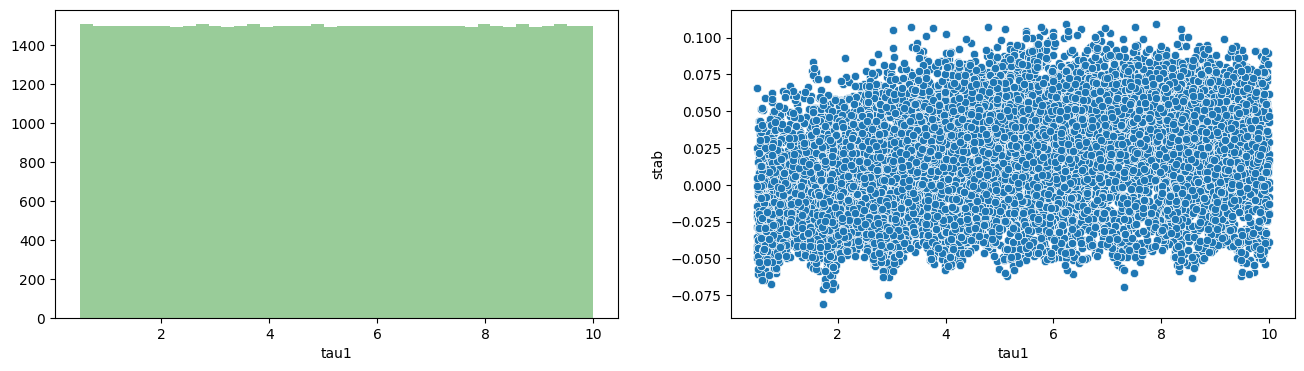

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


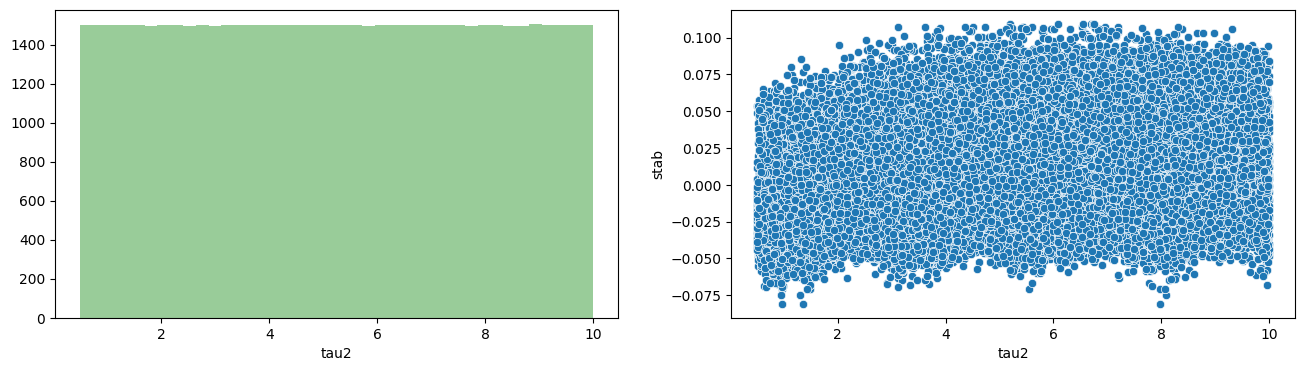

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


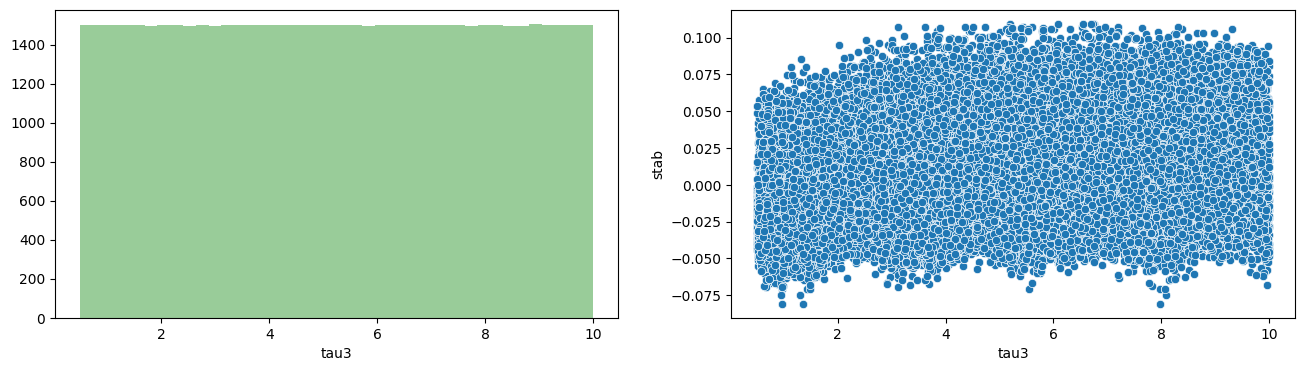

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


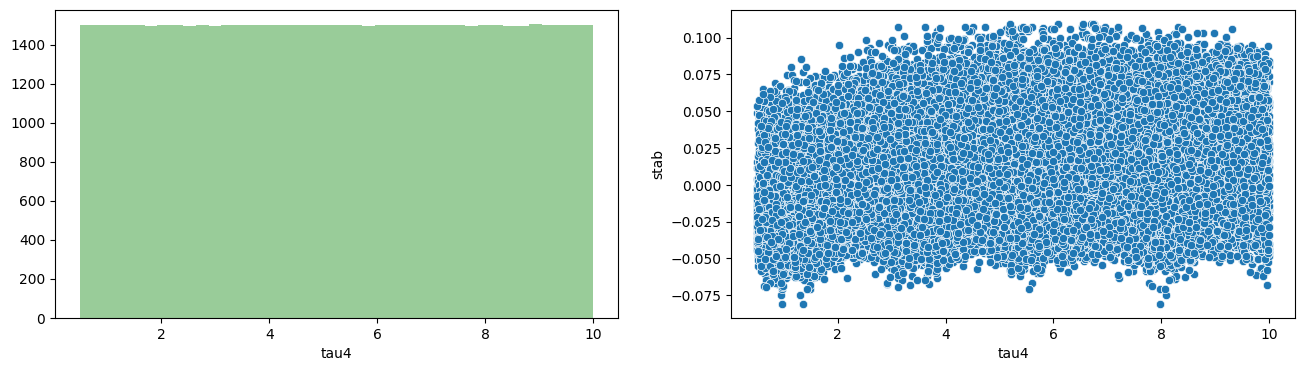

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


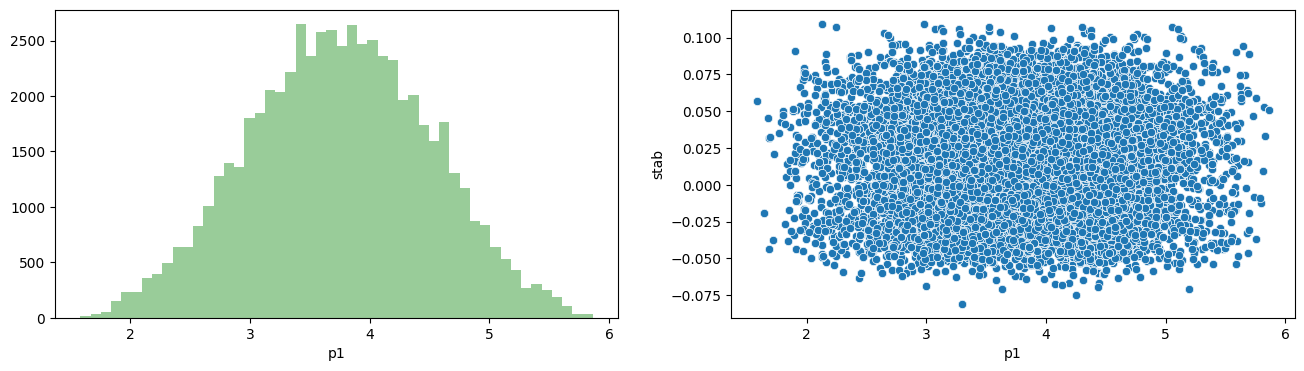

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


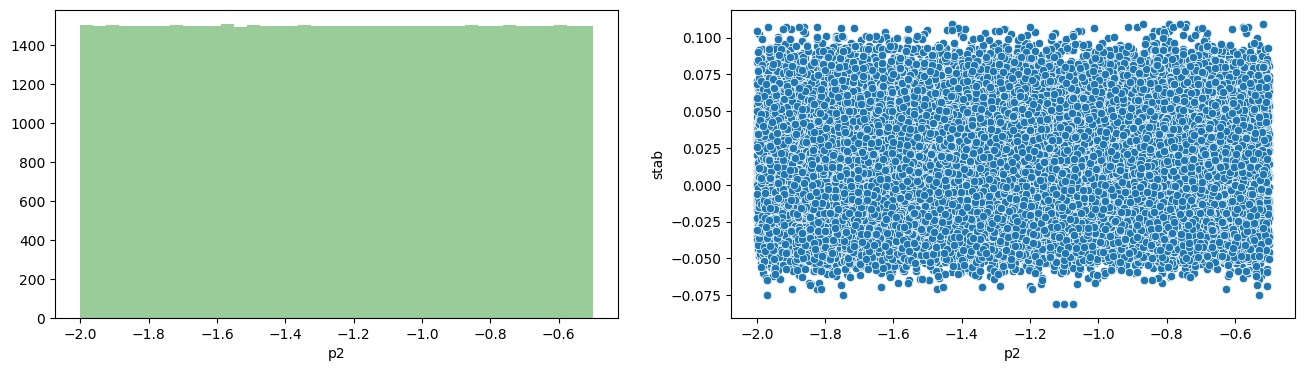

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


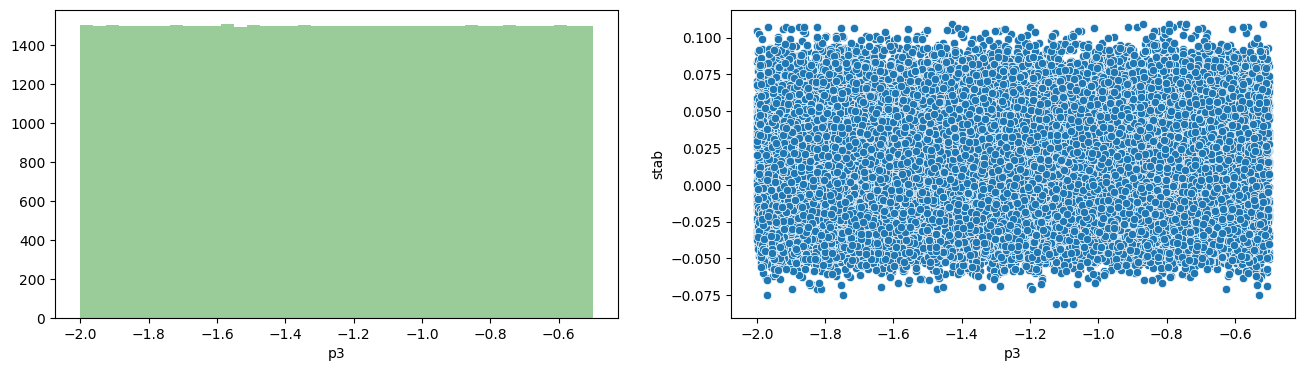

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


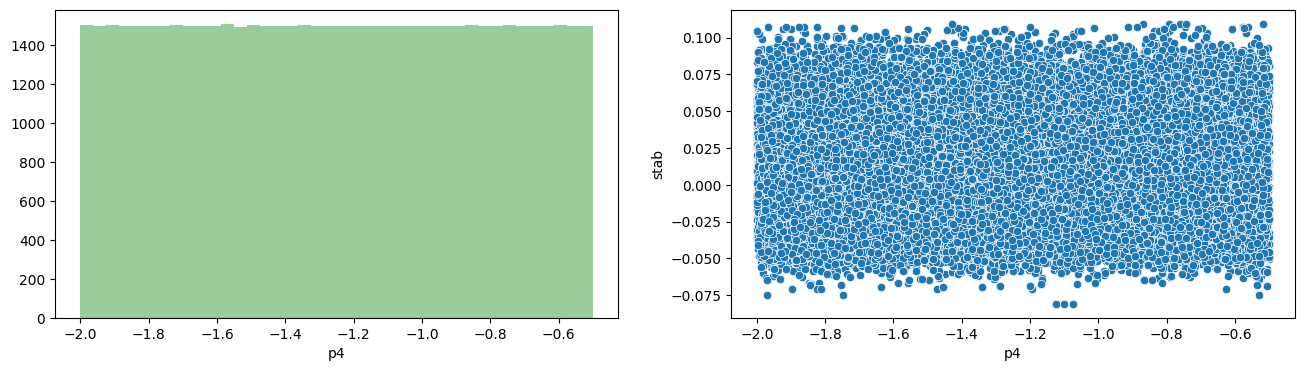

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


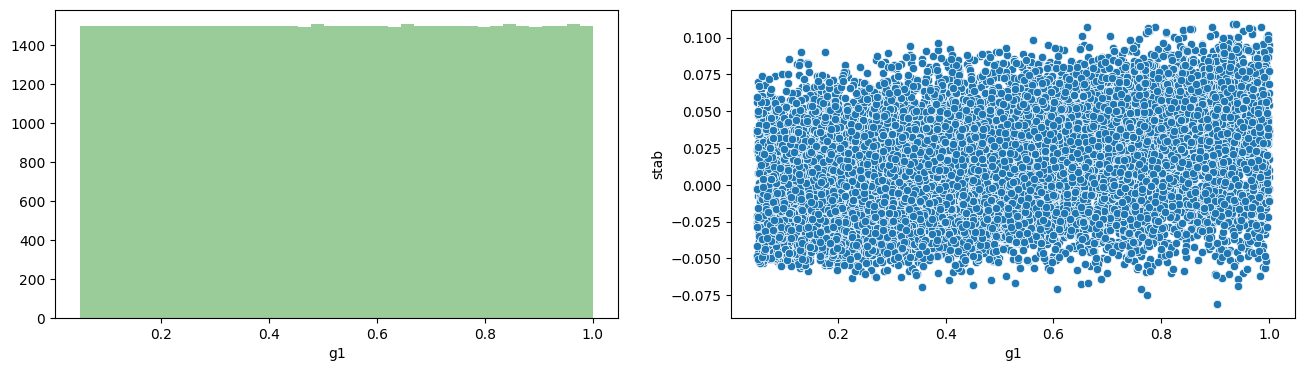

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


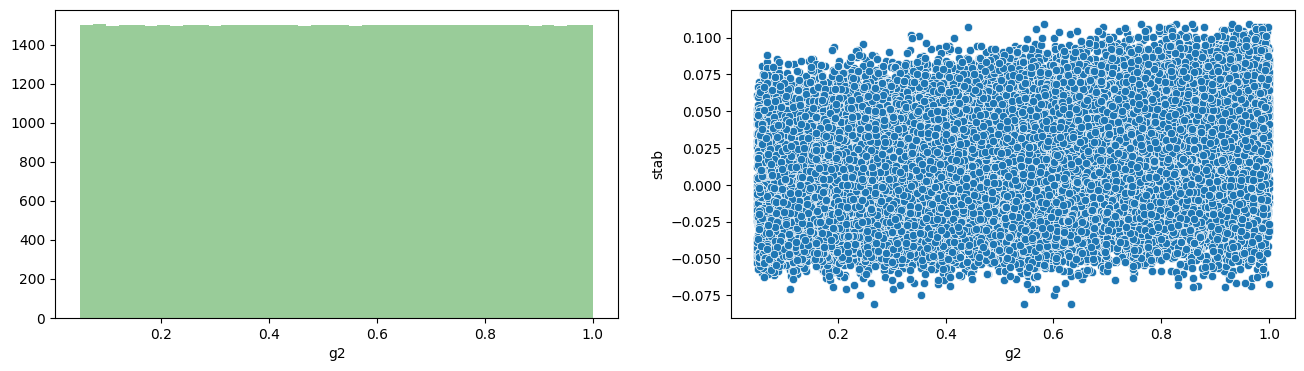

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


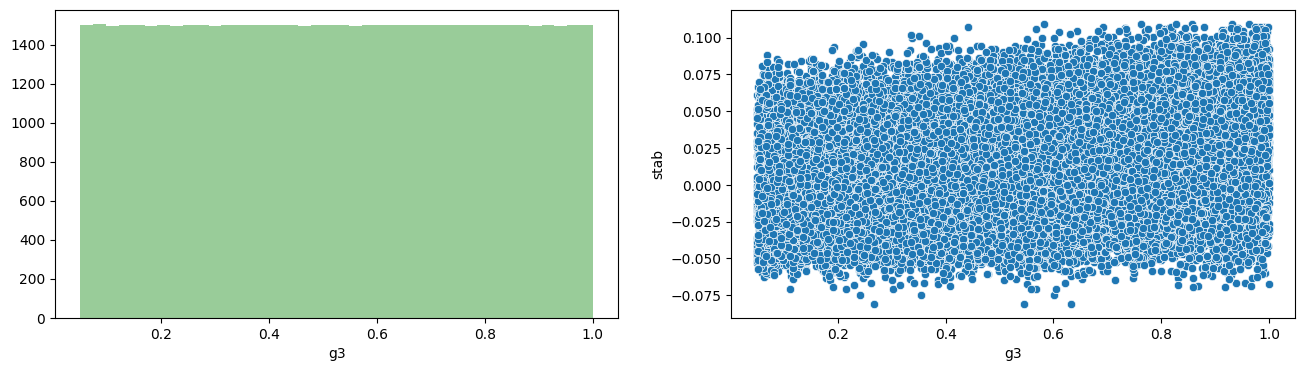

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


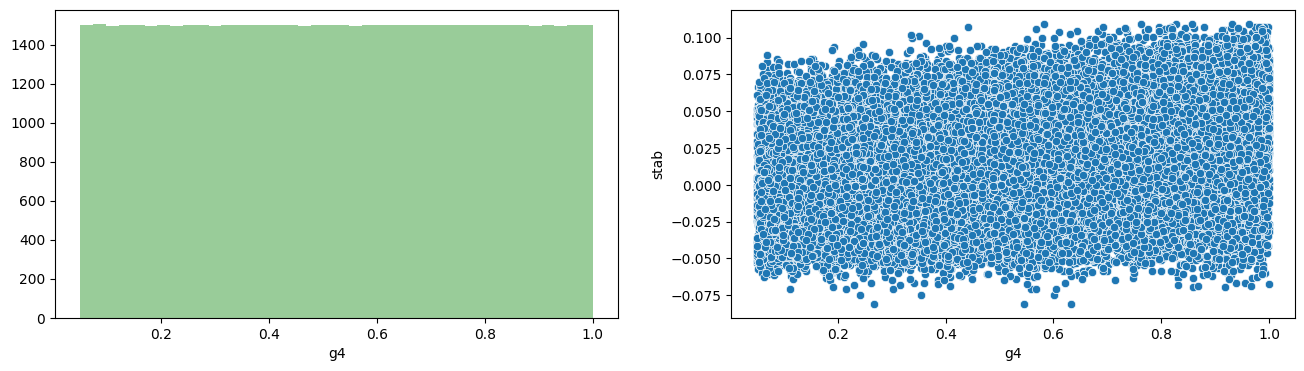

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


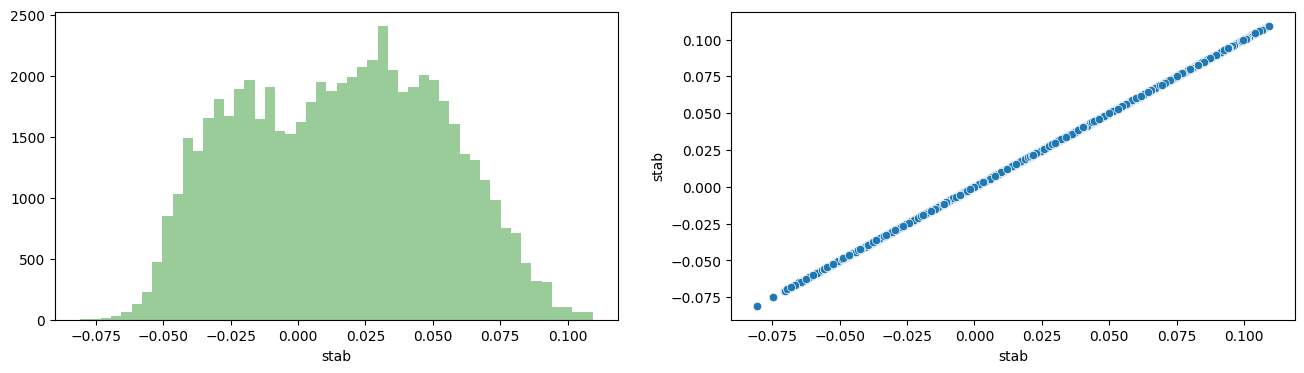

/tmp/ipython-input-7-1243290677.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')


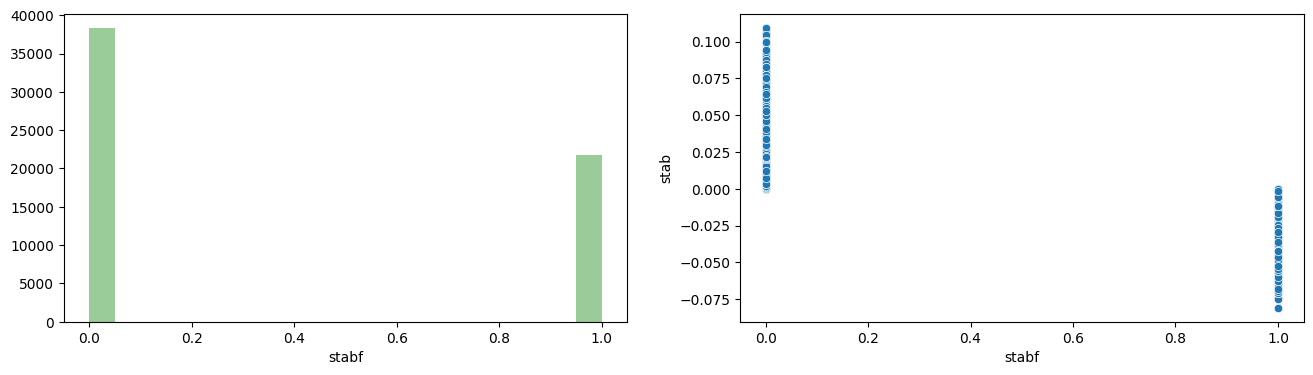

In [ ]:
sgdata = sgdata.sample(frac=1)
for column in sgdata.columns:
  assessment(sgdata, 'stab', column, -1)


In [ ]:
sgdata.p1.skew()

np.float64(-0.012688423269883422)

In [ ]:
print(f'Split of "unstable" (0) and "stable" (1) observations in the original dataset: ')
print(sgdata['stabf'].value_counts(normalize=True))


Split of "unstable" (0) and "stable" (1) observations in the original dataset: 
stabf
0    0.638
1    0.362
Name: proportion, dtype: float64


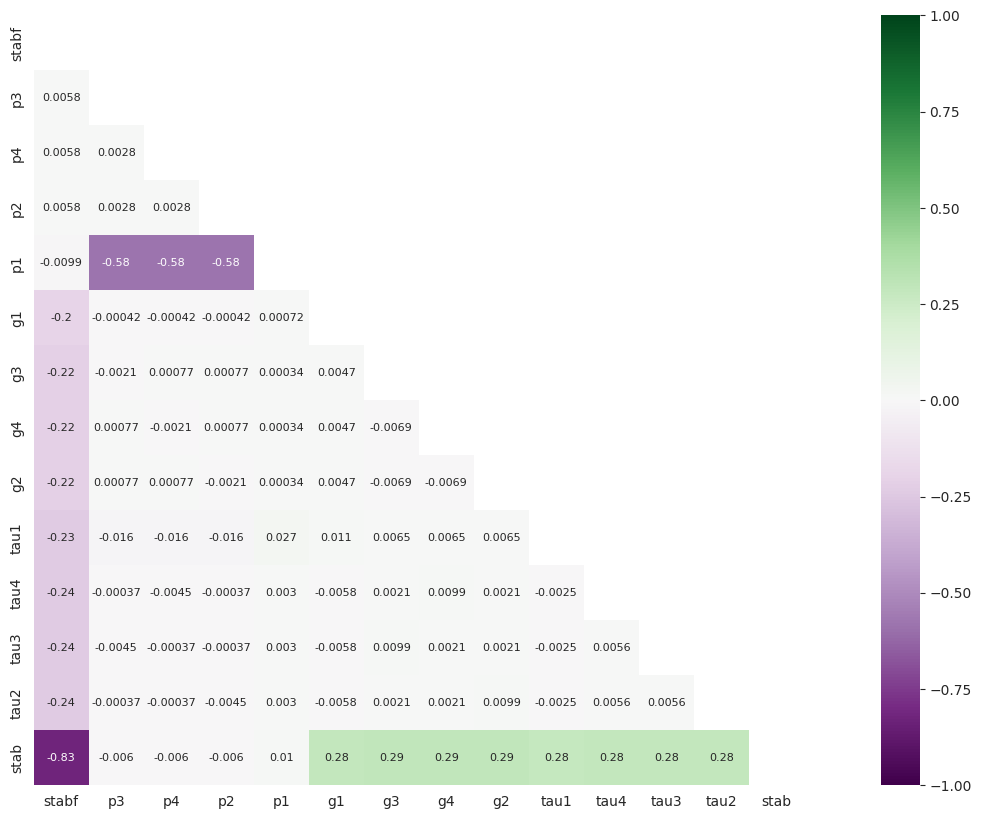

In [ ]:
correlation_map(sgdata ,'stabf', 14)


In [ ]:
sgdata.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
13919,8.320531,8.766874,3.394352,1.468729,3.940123,-1.410020,-1.599081,-0.931023,0.657445,0.173240,0.493384,0.178907,-0.005752,1
20391,0.679350,2.642845,5.812092,2.126665,5.282825,-1.883747,-1.599252,-1.799826,0.257965,0.249672,0.082193,0.628140,-0.029040,1
15721,1.314107,8.616720,4.099919,7.586647,3.670148,-0.954373,-0.828058,-1.887718,0.823178,0.711482,0.869782,0.503142,0.025206,0
22673,7.095286,6.361275,8.946149,8.161865,3.309520,-0.726581,-1.671903,-0.911035,0.546217,0.940619,0.563824,0.500328,0.078119,0
9569,5.560926,1.750338,5.922474,1.886656,4.896783,-1.298483,-1.695977,-1.902323,0.695807,0.303303,0.293327,0.172527,-0.019434,1


In [ ]:
X = sgdata.iloc[:,:12]
y=sgdata.iloc[:,13]

X_training  = X.iloc[:54000,:]
y_training = y.iloc[:54000]


X_testing  = X.iloc[54000:,:]
y_testing = y.iloc[54000:]

ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)
ratio_training,ratio_testing


(stabf
 0    0.637593
 1    0.362407
 Name: proportion, dtype: float64,
 stabf
 0    0.641667
 1    0.358333
 Name: proportion, dtype: float64)

In [ ]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values


In [ ]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

In [ ]:
classifier = Sequential()

classifier.add(Dense(units = 24, kernel_initializer='uniform', activation = 'relu', input_dim=12))

classifier.add(Dense(units = 24, kernel_initializer='uniform', activation = 'relu'))

classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
  x_train, x_val = X_training[train_index], X_training[val_index]
  y_train, y_val = y_training[train_index], y_training[val_index]
  classifier.fit(x_train, y_train, epochs=50, verbose=0)
  classifier_loss , classifier_accuracy = classifier.evaluate(x_val, y_val)
  print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2} %')
  cross_val_round +=1

Model evaluation

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.0810
Round 1 - Loss: 0.0808 | Accuracy: 9.7e+01 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.0478
Round 2 - Loss: 0.0512 | Accuracy: 9.8e+01 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0503
Round 3 - Loss: 0.0517 | Accuracy: 9.8e+01 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0467
Round 4 - Loss: 0.0487 | Accuracy: 9.8e+01 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0535
Round 5 - Loss: 0.0462 | Accuracy: 9.8e+01 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9857 - loss: 0.0385
Round 6 - Loss: 0.0407 | Accuracy: 9.9e+01 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9876 - loss: 0.0391
Round 7 - Loss: 0.0361 | Accuracy: 9.9e+01 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9869 - loss: 0.0299
Round 8 - Loss: 0.0381 | Accuracy: 9.8e+01 %
169/169 ━━━━━━━━━━━━━━

In [ ]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0,1]),

                  index = ["Actual Unstable", "Actual Stable"],
                  columns = ["Predicted Unstable", "Predicted Stable"]
)

cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3814,36
Actual Stable,78,2072


In [ ]:
print(f'Accuracy as per the confusion matrix: {((cm.iloc[0,0] + cm.iloc[1,1])/ len(y_testing)*100):.2f}%')


Accuracy as per the confusion matrix: 98.10%
